# Proyecto Predicción de Variables Continuas

La data contiene las siguientes columnas:

* 'Avg. Area Income': El promedio de ingreso del area en donde se encuentra ubicada la casa.
* 'Avg. Area House Age': El promedio de las edades de las casas del area en donde se encuentra la casa.
* 'Avg. Area Number of Rooms': El promedio de cuartos que existen en el area de la casa.
* 'Avg. Area Number of Bedrooms': El promedio de dormitorios del area de la casa. 
* 'Area Population': El total de personas que viven en el area de la casa
* 'Price': El precio al que fue vendida la casa
* 'Address': La dirección de la casa

### Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
USAhousing = pd.read_csv('USA_Housing.csv')[['Price','Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Address']]

In [27]:
USAhousing.head()

Price  Avg. Area Income  Avg. Area House Age  \
0  1.059034e+06      79545.458574             5.682861   
1  1.505891e+06      79248.642455             6.002900   
2  1.058988e+06      61287.067179             5.865890   
3  1.260617e+06      63345.240046             7.188236   
4  6.309435e+05      59982.197226             5.040555   

   Avg. Area Number of Rooms  Avg. Area Number of Bedrooms  Area Population  \
0                   7.009188                          4.09     23086.800503   
1                   6.730821                          3.09     40173.072174   
2                   8.512727                          5.13     36882.159400   
3                   5.586729                          3.26     34310.242831   
4                   7.839388                          4.23     26354.109472   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [31]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Price                           5000 non-null float64
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [32]:
USAhousing.describe()

Price  Avg. Area Income  Avg. Area House Age  \
count  5.000000e+03       5000.000000          5000.000000   
mean   1.232073e+06      68583.108984             5.977222   
std    3.531176e+05      10657.991214             0.991456   
min    1.593866e+04      17796.631190             2.644304   
25%    9.975771e+05      61480.562388             5.322283   
50%    1.232669e+06      68804.286404             5.970429   
75%    1.471210e+06      75783.338666             6.650808   
max    2.469066e+06     107701.748378             9.519088   

       Avg. Area Number of Rooms  Avg. Area Number of Bedrooms  \
count                5000.000000                   5000.000000   
mean                    6.987792                      3.981330   
std                     1.005833                      1.234137   
min                     3.236194                      2.000000   
25%                     6.299250                      3.140000   
50%                     7.002902                      4.050000   
75%                     7.665871                      4.490000   
max                    10.759588                      6.500000   

       Area Population  
count      5000.000000  
mean      36163.516039  
std        9925.650114  
min         172.610686  
25%       29403.928702  
50%       36199.406689  
75%       42861.290769  
max       69621.713378

In [33]:
USAhousing.columns

Index(['Price', 'Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Address'],
      dtype='object')

# Exploración Visual

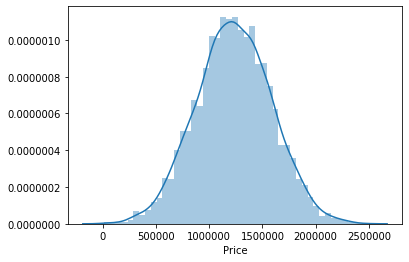

In [34]:
sns.distplot(USAhousing['Price'])

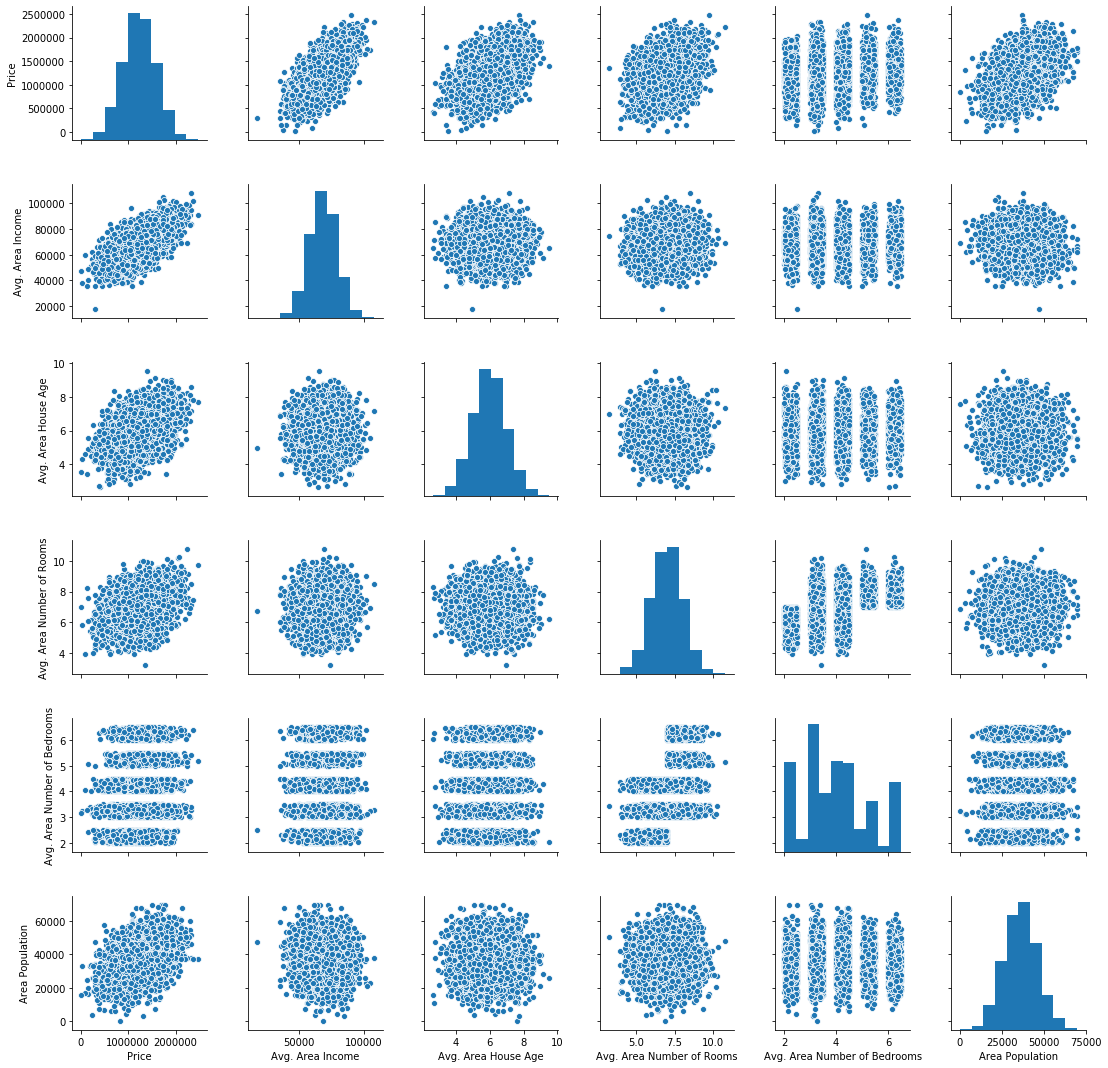

In [35]:
sns.pairplot(USAhousing)

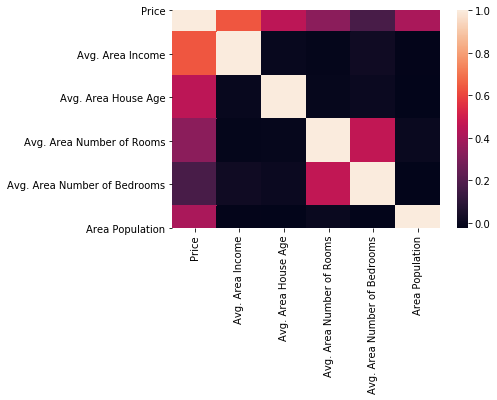

In [36]:
sns.heatmap(USAhousing.corr())

## Entrenamiento de Modelo de Regression Lineal


In [38]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creando y Entrenando el Modelo

In [44]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluación del Modelo

Evaluemos el modelo e interpretemos sus coefficientes

In [48]:
# print the intercept
print(lm.intercept_)

-2640159.7968525263


In [49]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

Interpretación de los coeficientes:

- Manteniendo todas las demás variables constantes, un aumento de 1 unidad en el **Avg. Area Income** está asociado con **un aumento de \$21.52**
- Manteniendo todas las demás variables constantes, un aumento de 1 unidad en **Avg. Area House Age** está asociada con **un aumento de \$164,883.28**
- Manteniendo todas las demás variables constantes, un aumento de 1 unidad en **Avg. Area Number of Rooms** del área está asociado con **un aumento de \$122,368.67**
- Manteniendo todas las demás variables constantes, un aumento de 1 unidad en **Avg. Area Number of Bedrooms** del área está asociado con **un aumento de \$2,233.80**
- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Area Population** se asocia con **un aumento de \$15.15**



## Visualizar la Efficiencia de un Modelo

In [50]:
predictions = lm.predict(X_test)

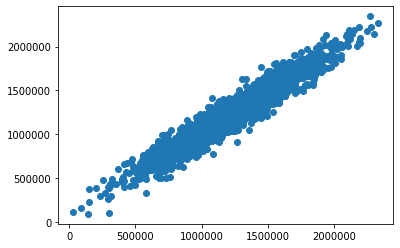

In [51]:
plt.scatter(y_test,predictions)

**Residual Histogram**

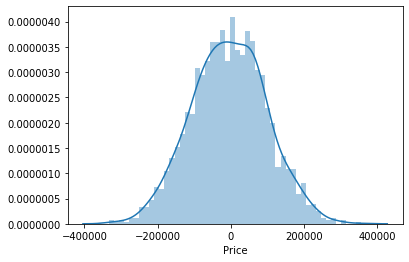

In [52]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics

Aquí hay tres métricas de evaluación comunes para problemas de regresión:

**Mean Absolute Error** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) es la media de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** es el más fácil de entender, porque es el error medio.
- **MSE** es más popular que MAE, porque MSE "castiga" errores mayores, lo que tiende a ser útil en el mundo real.
- **RMSE** es incluso más popular que MSE, porque RMSE se puede interpretar en las unidades "y".

Todas estas son **funciones de pérdida**, porque queremos minimizarlas.

In [54]:
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914948
MSE: 10460958907.209064
RMSE: 102278.8292229094
